<a href="https://colab.research.google.com/github/GabrielHinostroza2/EDA_FundamentosML_GabrielHinostroza/blob/main/Evaluacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
 #Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy import stats

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Cargar el data set y mostrar las 10 primeras filas con sus columnas.
df = pd.read_csv(name, sep=",", encoding='latin1')
df.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [17]:
# Identificación de variables y su tipo, númericas y categoricas
#Información de las columnas (8)
df.info()

df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


Identificamos variables númericas y categóricas.

In [59]:
df = df.rename(columns={"Quantity": "Cantidad", "UnitPrice": "PrecioUnit", "CustomerID": "CodCliente", "Country": "Pais", "InvoiceDate": "FechYhora","StockCode": "CodStock",})


Renombrar las columnas, quantity, unitprice, customerId, etc, a nombres en español para mejor comprensión

In [26]:
#Medidas de tendencia central y dispersión
#Media, mediana, percentiles, minimo, maximo y desviación estándar.
df[['Cantidad', 'PrecioUnit']].describe()


,Cantidad,PrecioUnit
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


Medidas de tendencia, media, mediana, desviación estándar, mínimo y máximo

In [21]:
df.shape

(541909, 8)

In [22]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5268, 8)


In [27]:
df.count()

,0
InvoiceNo,541909
StockCode,541909
Description,540455
Cantidad,541909
FechYhora,541909
PrecioUnit,541909
CodCliente,406829
Pais,541909


In [28]:
#Borrar las columnas duplicadas
df = df.drop_duplicates()
df.head(5)

,InvoiceNo,StockCode,Description,Cantidad,FechYhora,PrecioUnit,CodCliente,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


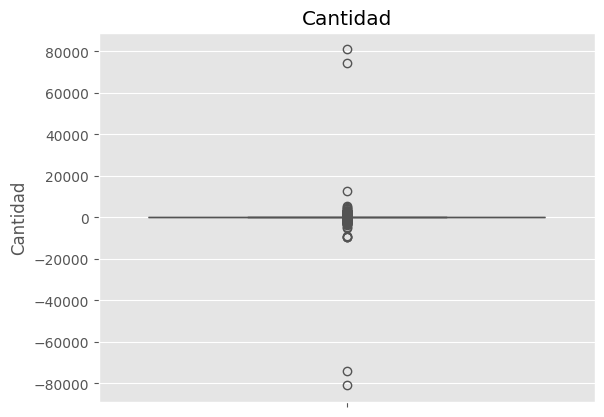

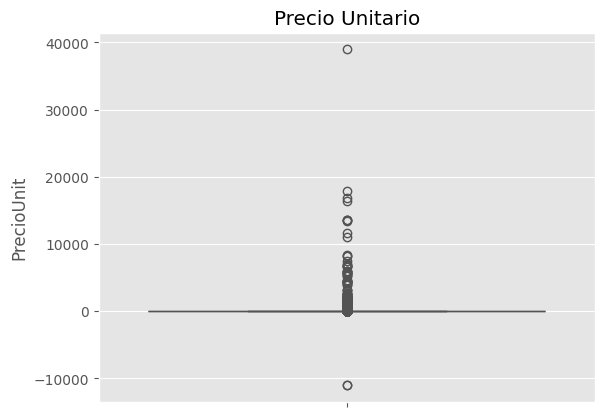

In [54]:
#Valores atípicos

#Histogramas de cantidad
sns.boxplot(df['Cantidad'])
plt.title('Cantidad')
plt.show()

#Histograma de Precio Unitario
sns.boxplot(df['PrecioUnit'])
plt.title('Precio Unitario')
plt.show()

Visualización gráfica de bloxplots para valores atípicos en Cantidad y Precio Unitario

In [53]:

#Frecuencia de países
df['Pais'].value_counts()

#Los 10 países con mas compras
df['Pais'].value_counts().head(10)

,count
Pais,
United Kingdom,490300
Germany,9480
France,8541
EIRE,8184
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1994
Portugal,1510


Los 10 países con mas compras en el E-Commerce Data

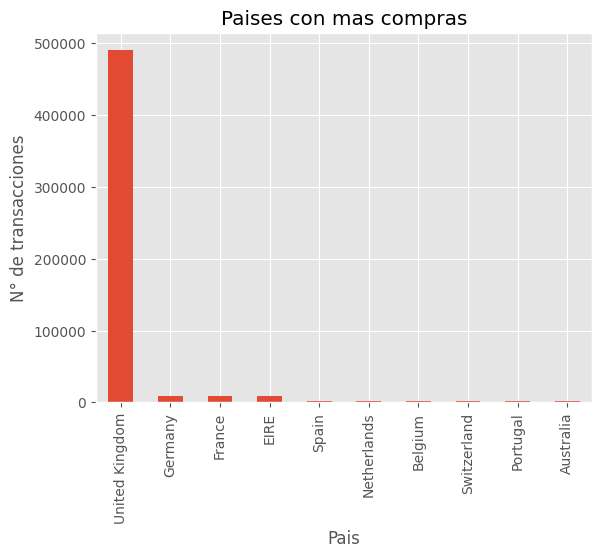

In [52]:
#Los 10 países con mas compras histograma
df['Pais'].value_counts().head(10).plot(kind='bar')
plt.title('Paises con mas compras')
plt.ylabel('N° de transacciones')
plt.show()


De acuerdo al histograma de los 10 países con mas compras, El Reino Unido se diferencia de los 9 restantes con una enorme diferencia, teniendo 490.300 compras

In [51]:
# Cantidades negativas
df[df['Cantidad'] < 0]

# Precios negativos
df[df['PrecioUnit'] < 0]


,InvoiceNo,CodStock,Descripcion,Cantidad,PrecioUnit,CodCliente,Pais,Year,Month,Day
FechYhora,,,,,,,,,,
2011-08-12 14:51:00,A563186,B,Adjust bad debt,1,-11062.06,NaN,United Kingdom,2011,8,12
2011-08-12 14:52:00,A563187,B,Adjust bad debt,1,-11062.06,NaN,United Kingdom,2011,8,12


Identifiación de los valores atípicos, ya que el Precio unitario es negativo.

In [63]:
#Analísis temporal
df['FechYhora'] = pd.to_datetime(df['FechYhora'])
df.set_index('FechYhora', inplace=True)

#Transacciones por mes
df['Cantidad'].resample('M').sum().plot(kind='bar')
plt.title('Cantidad de transacciones por mes')
plt.show();


KeyError: 'FechYhora'

Indicadores de negocio

In [68]:
#Ticket promedio
df.groupby('Descripcion')['Cantidad'].sum().sort_values(ascending=False).head(10)


,Cantidad
Descripcion,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
JUMBO BAG RED RETROSPOT,47260
POPCORN HOLDER,36322
ASSORTED COLOUR BIRD ORNAMENT,36282
PACK OF 72 RETROSPOT CAKE CASES,36016
WHITE HANGING HEART T-LIGHT HOLDER,35298
RABBIT NIGHT LIGHT,30631
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26299


In [73]:
#Comparar por país con su precio total
df.groupby('Pais')['PrecioTotal'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Ventas totales por país")
plt.show()


KeyError: 'Column not found: PrecioTotal'

Conclusiones:
El dataset contiene valores atípicos como precios o cantidades negativas.

Gran parte de las ventas provienen del Reino Unido.

Hay una fuerte estacionalidad en las compras (mayor volumen en algunos meses).

Algunos productos se venden muchísimo más que otros, lo cual podría influir en el inventario.

El ticket promedio es un buen factor para indicar si tuvo buen gasto por cliente.